In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("/content/drive/MyDrive/dataset/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
def nullCountPlot(df):
  df=df.isnull().sum().reset_index()
  df.rename(columns={'index':'Columns',0:'Count'},inplace=True)
  if df.shape[0]>20:
    df=df[df["Count"]>0]
  plt.figure(figsize=(25,10))
  plt.bar(x=df['Columns'],height=df["Count"],width=0.5)
  plt.ylabel("Count")
  plt.xlabel("Columns")
  plt.title("NULL COUNT")
  plt.show()

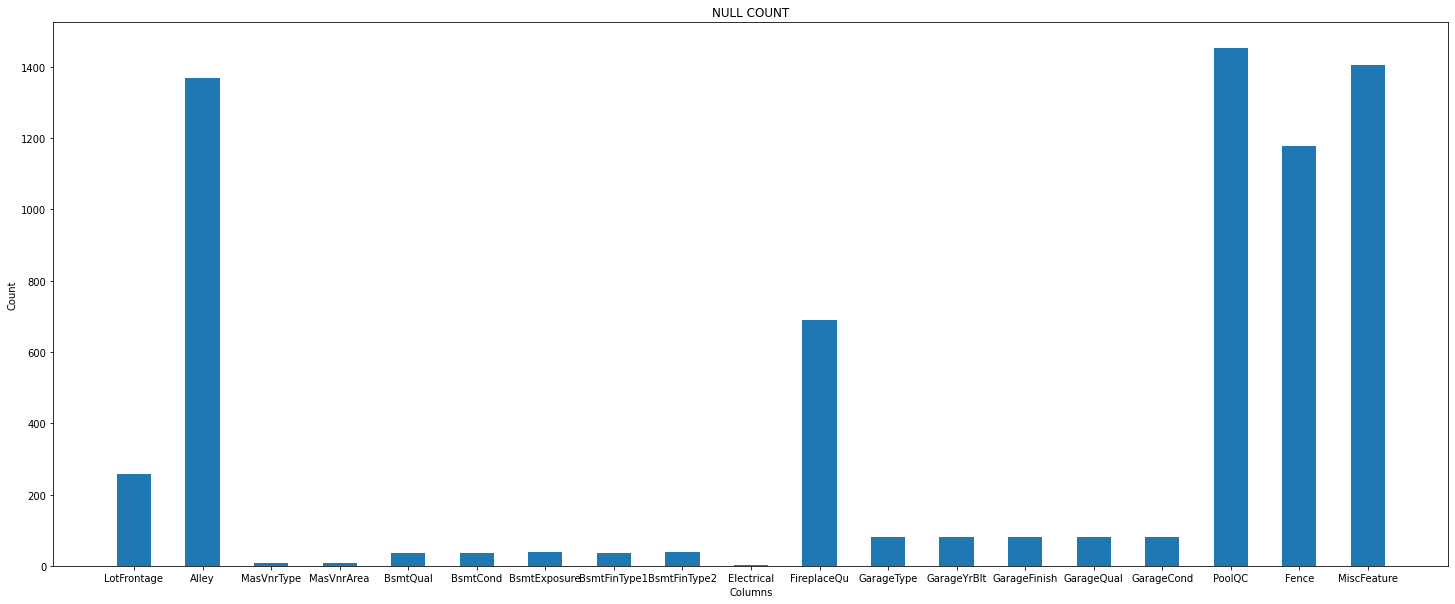

In [5]:
nullCountPlot(df)

In [6]:
drop_col=[]
for col in df.columns:
  if (df[col].isnull().sum())/df.shape[0] > 0.7:
    drop_col.append(col)
drop_col

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
df.drop(drop_col+["Id",'GarageYrBlt'],axis=1,inplace=True)

In [8]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.fillna(value={'LotFrontage':df.LotFrontage.mean(),'MasVnrType':df['MasVnrType'].mode()[0],'MasVnrArea':df['MasVnrArea'].mean(),
                 'BsmtQual':df['BsmtQual'].mode()[0],'BsmtCond':df['BsmtCond'].mode()[0],'BsmtExposure':df['BsmtExposure'].mode()[0],
                 'BsmtFinType1':df['BsmtFinType1'].mode()[0],'BsmtFinType2':df['BsmtFinType2'].mode()[0],'Electrical':df['Electrical'].mode()[0],
          'GarageType':df['GarageType'].mode()[0],'GarageCond':df['GarageCond'].mode()[0],'GarageQual':df['GarageQual'].mode()[0],
          'GarageFinish':df['GarageFinish'].mode()[0],'FireplaceQu':df['FireplaceQu'].mode()[0]},inplace=True)

In [10]:
cat_columns=df.select_dtypes(include=object).columns

In [11]:
cat_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

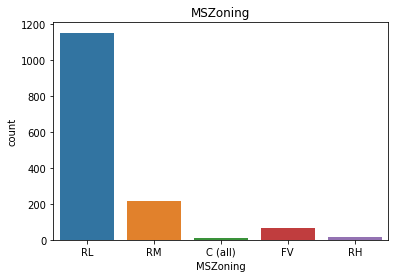

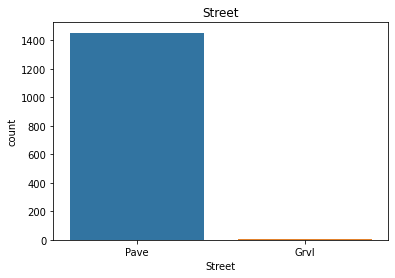

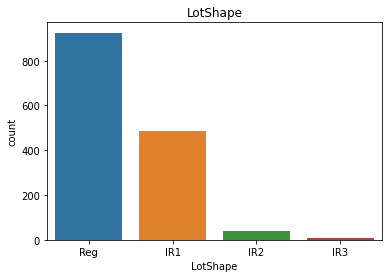

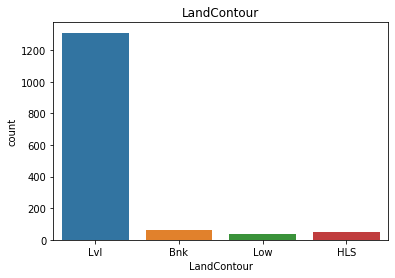

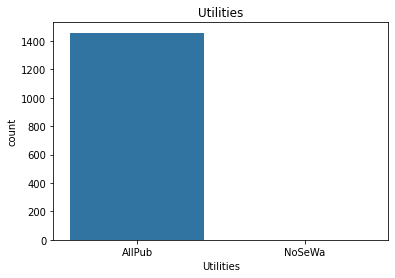

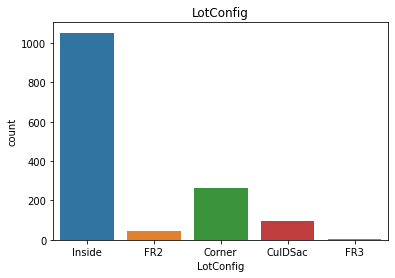

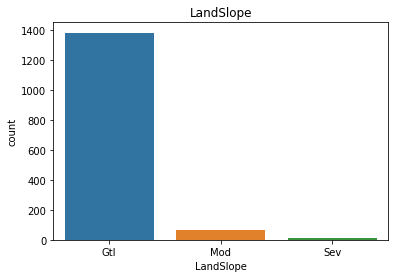

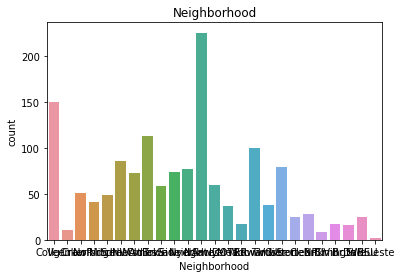

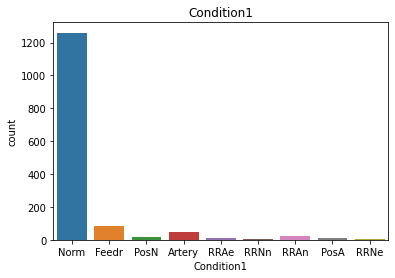

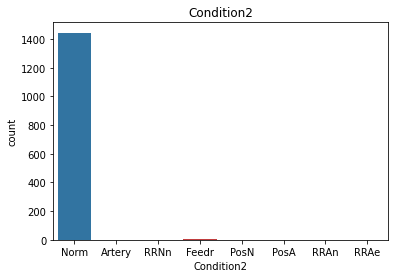

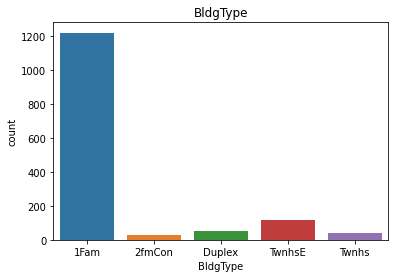

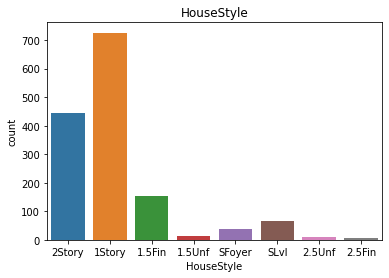

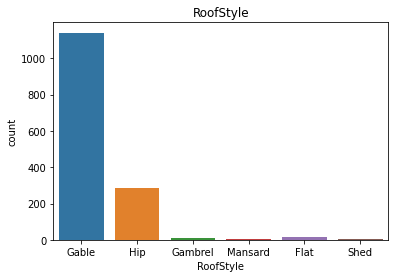

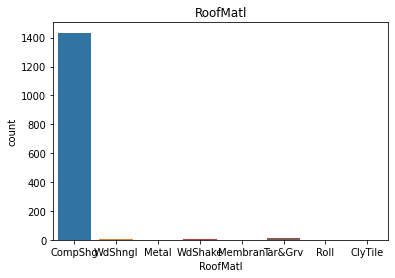

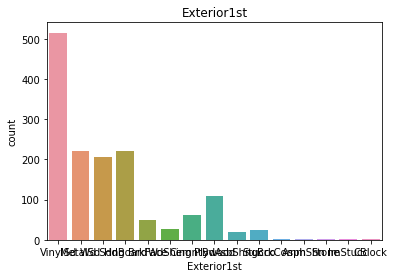

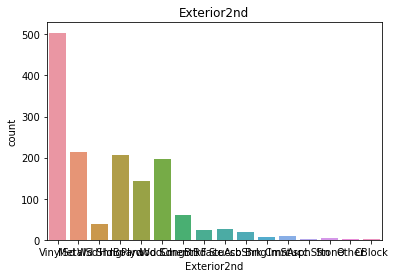

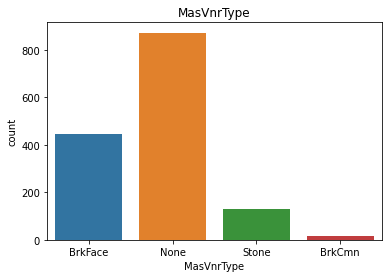

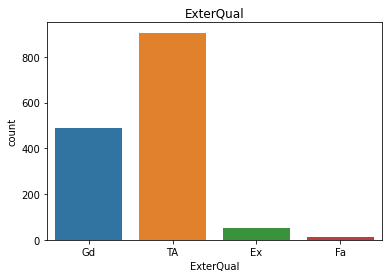

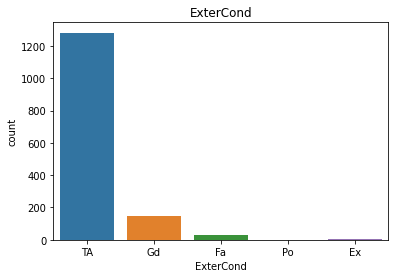

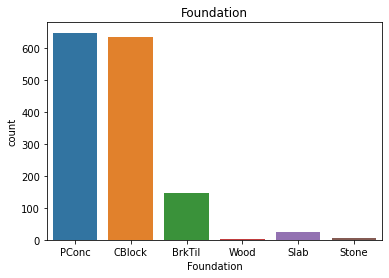

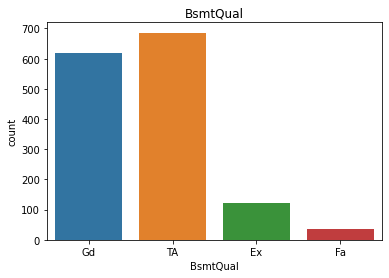

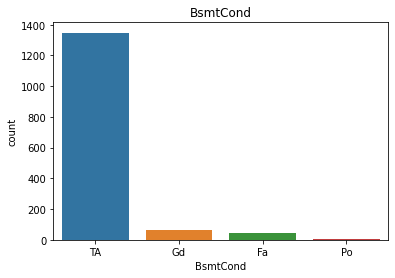

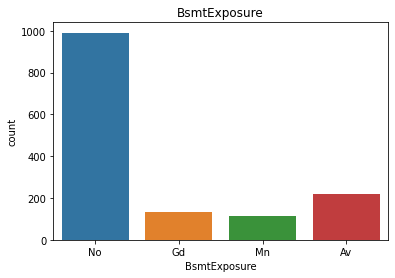

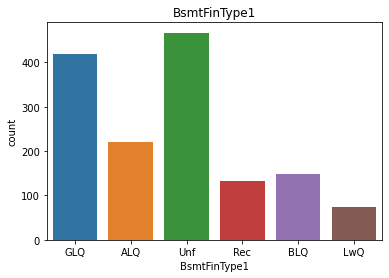

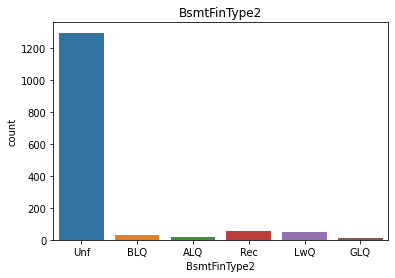

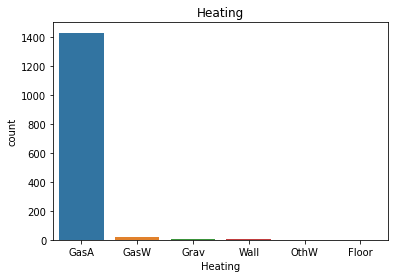

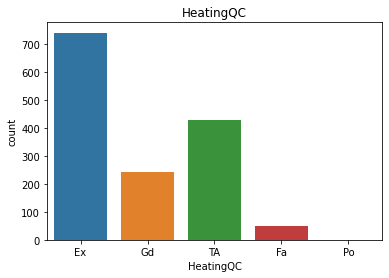

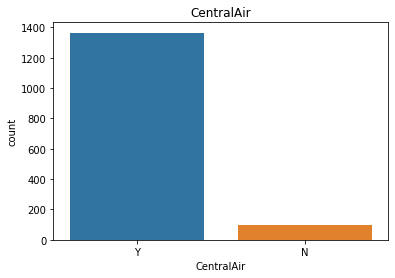

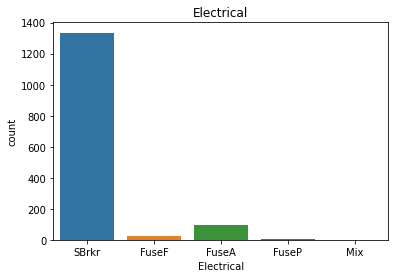

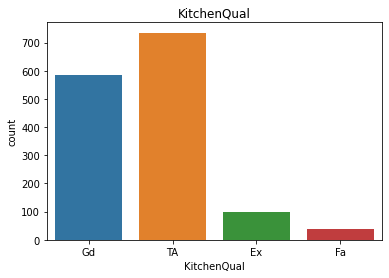

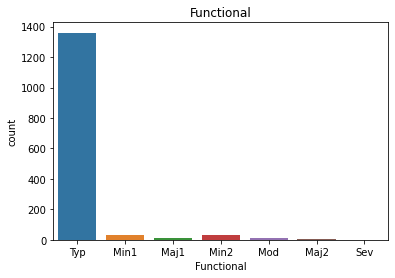

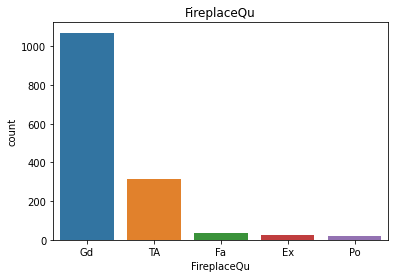

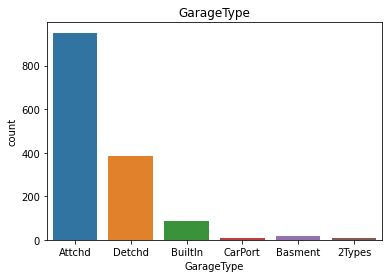

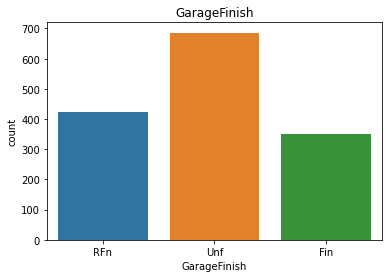

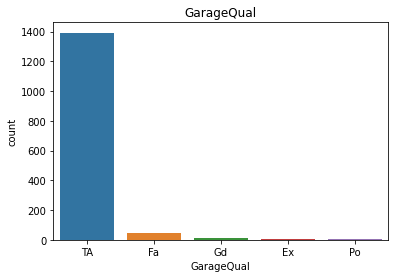

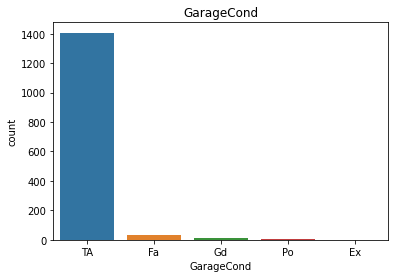

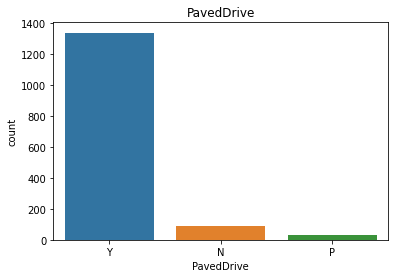

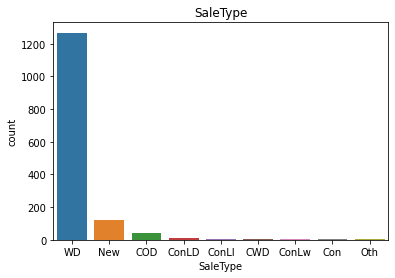

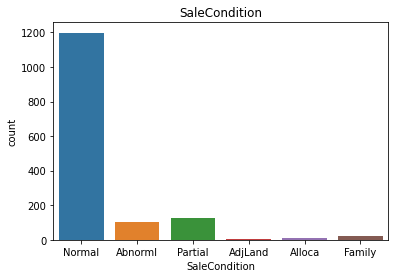

In [12]:
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")
for col in cat_columns:
  plt.figure()
  plt.title(col)
  sn.countplot(data = df , x = col)

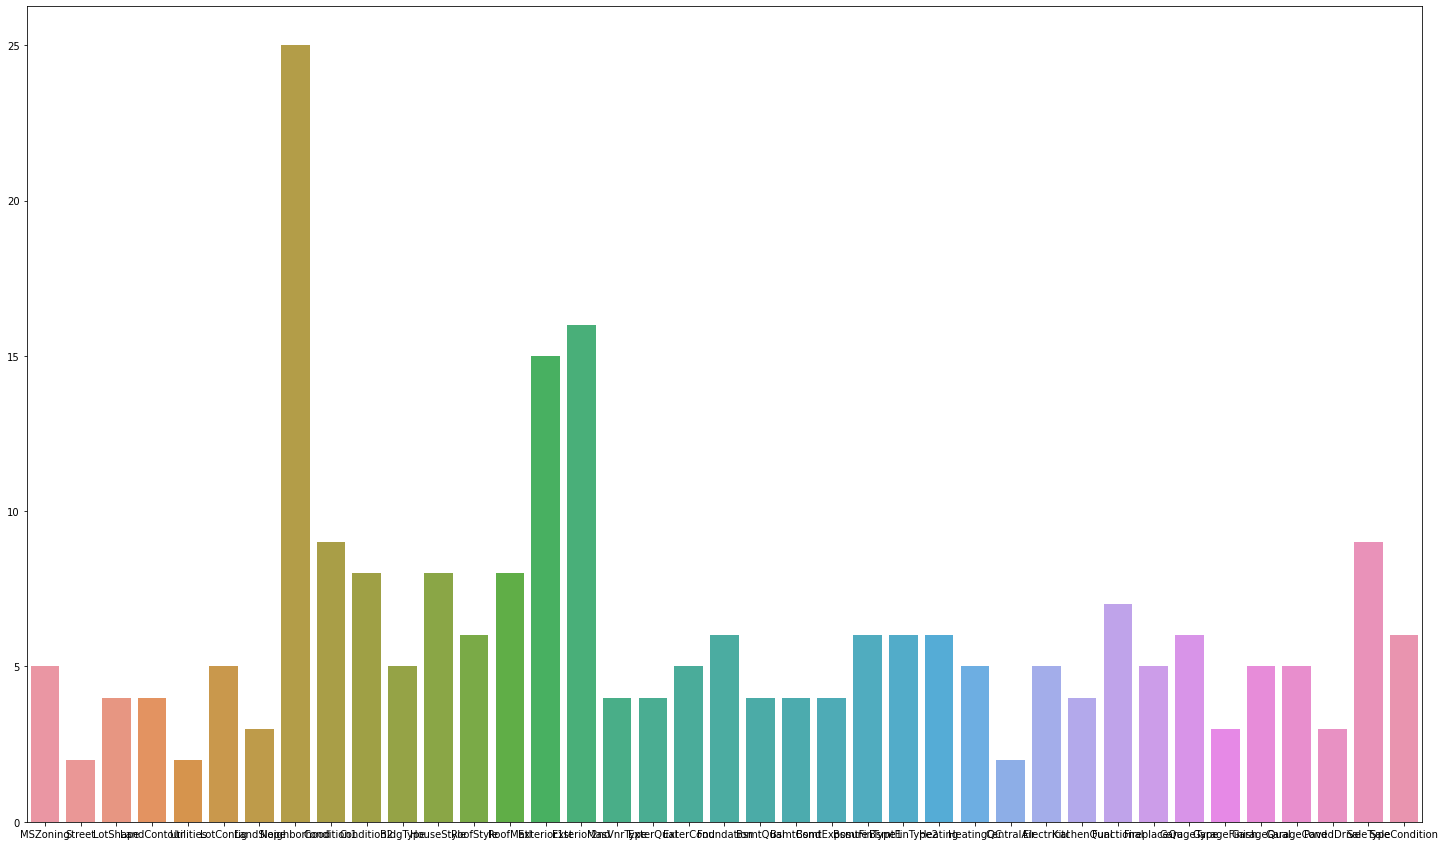

In [13]:
#number of classes in  each category
cat_num=[]
for cat in cat_columns:
  cat_num.append(len(df[cat].unique()))
plt.figure(figsize=(25,15))
sn.barplot(x=cat_columns,y=cat_num)
plt.show()

In [14]:
num_columns=df.select_dtypes(include=["int64",'float64']).columns
num_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

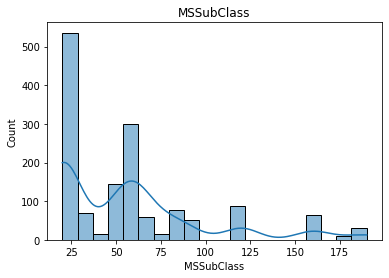

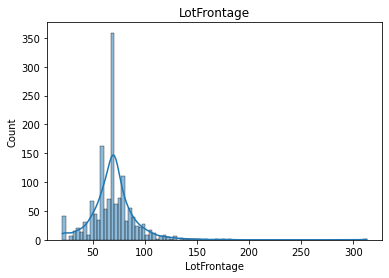

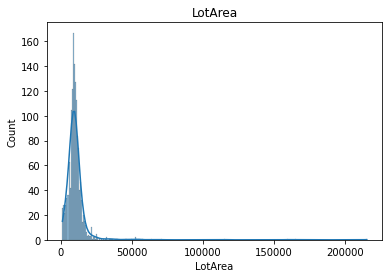

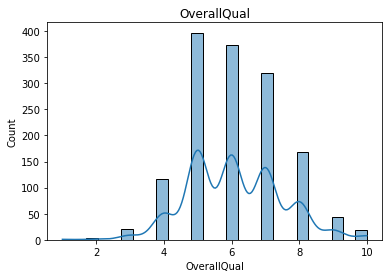

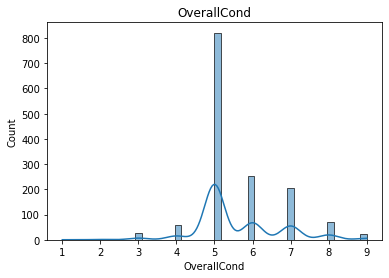

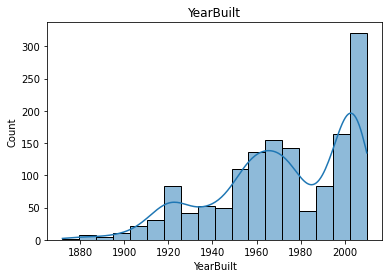

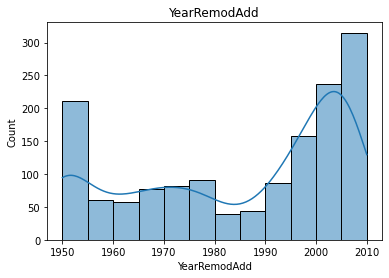

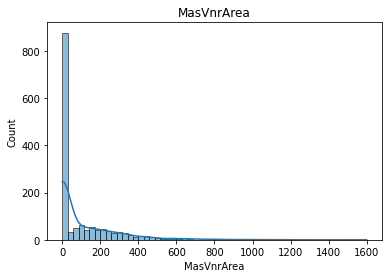

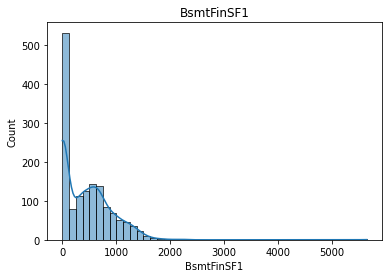

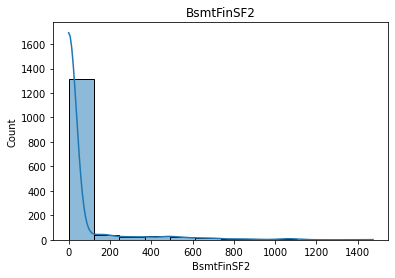

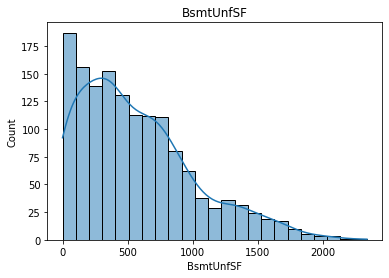

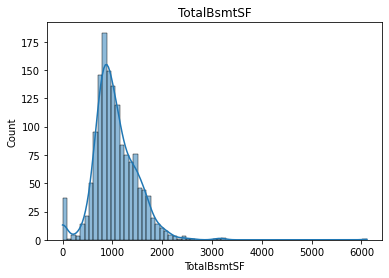

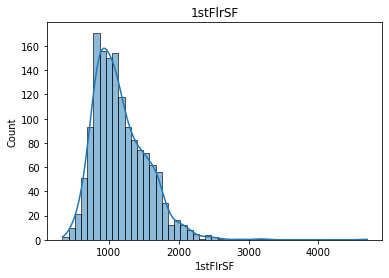

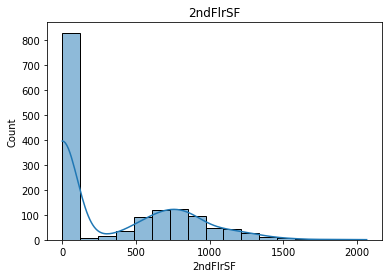

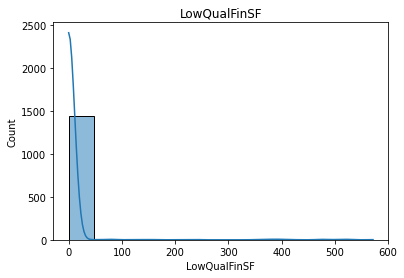

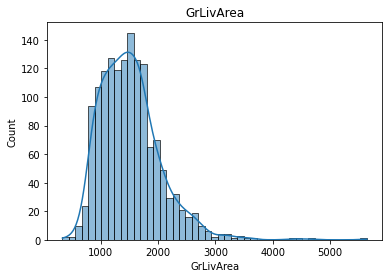

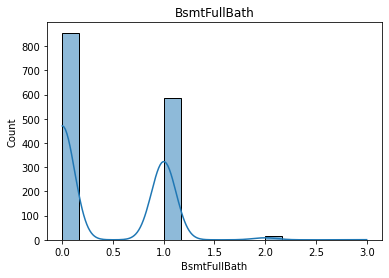

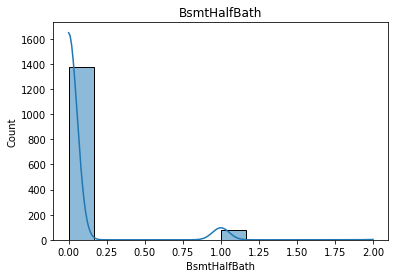

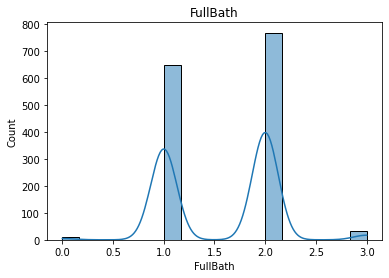

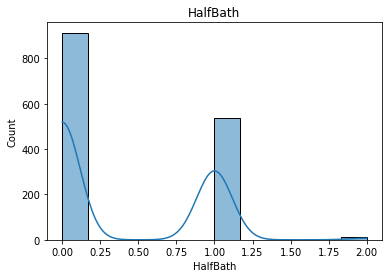

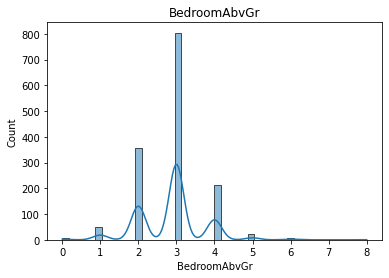

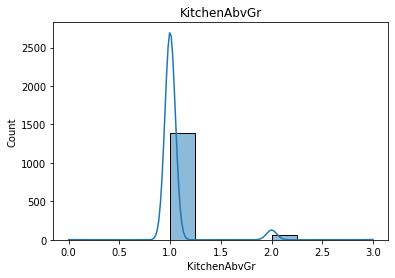

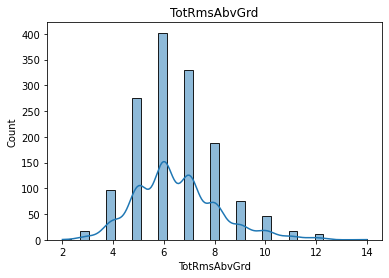

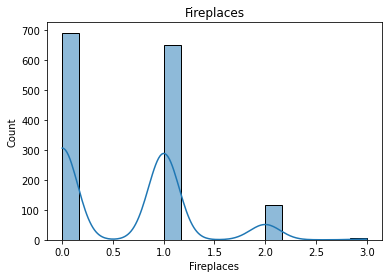

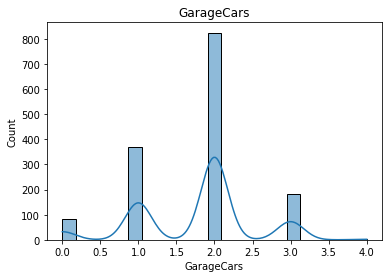

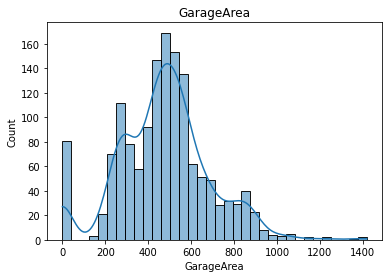

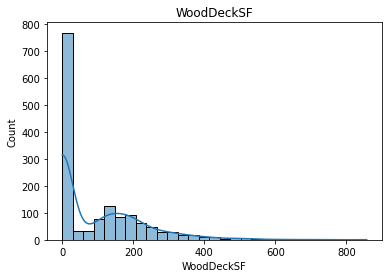

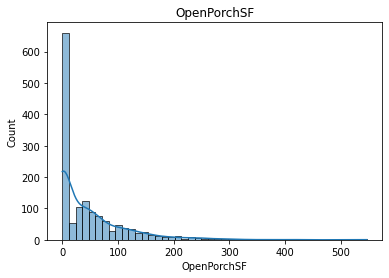

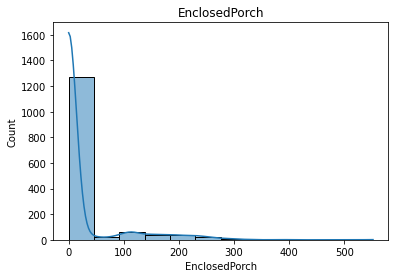

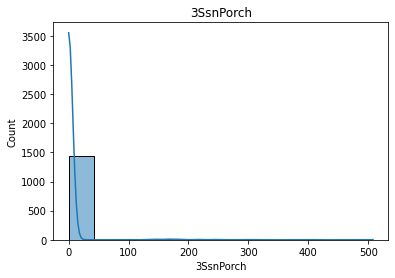

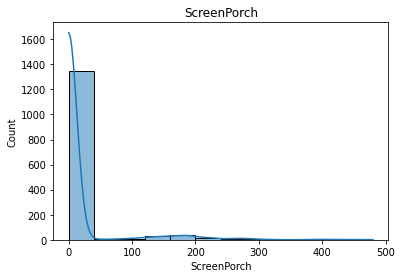

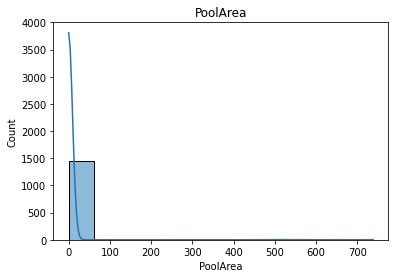

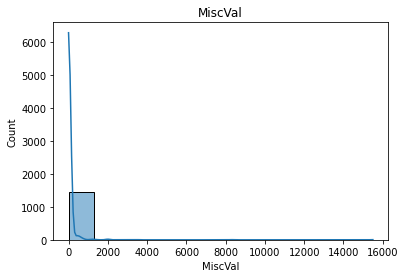

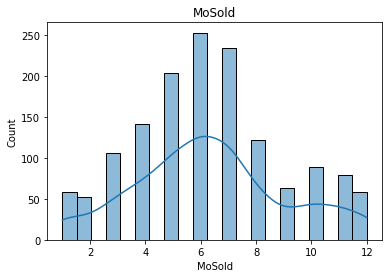

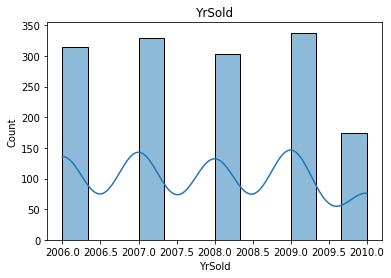

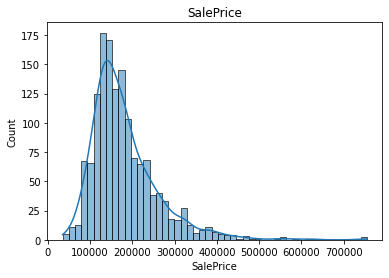

In [15]:
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")
for col in num_columns:
  plt.figure()
  plt.title(col)
  sn.histplot(data = df , x = col,kde=True)

In [16]:
test=pd.read_csv("/content/drive/MyDrive/dataset/test.csv")

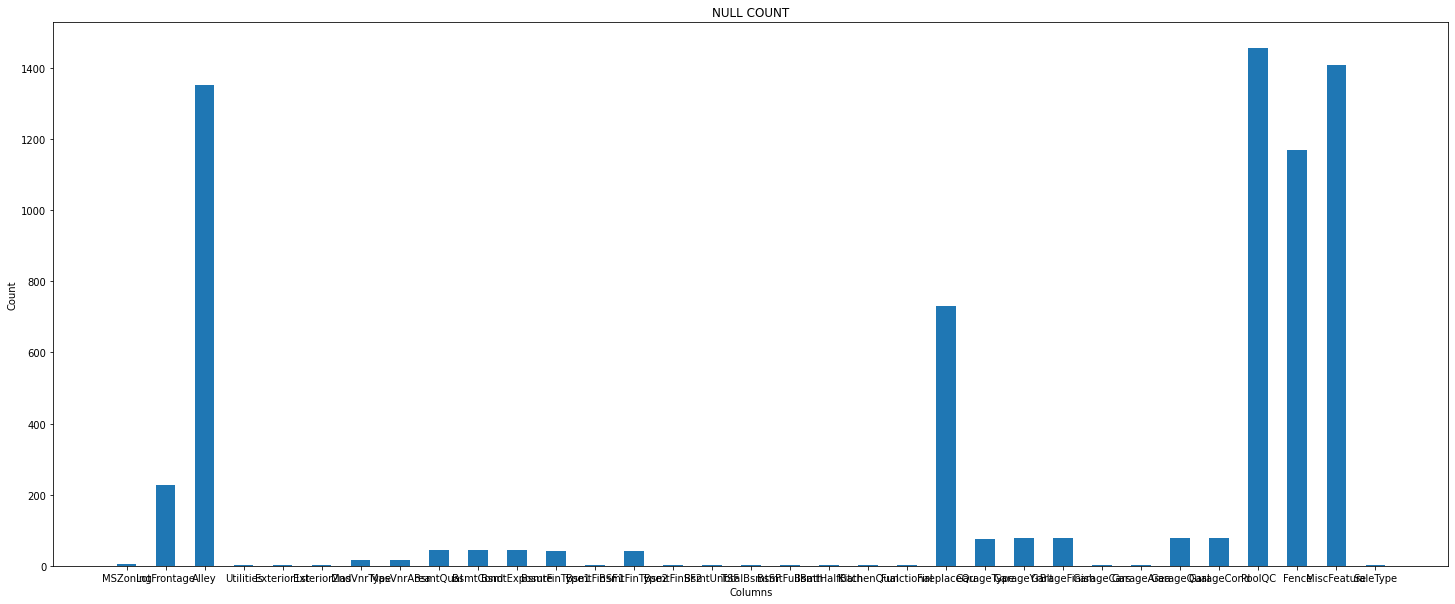

In [17]:
nullCountPlot(test)

In [18]:
test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature','GarageYrBlt'],axis=1,inplace=True)

In [19]:
columns=test.columns
for col in columns:
  if test[col].dtype==object:
    test.fillna(value={col:test[col].mode()[0]},inplace=True)
  else:
    test.fillna(value={col:test[col].mean()},inplace=True)

In [20]:
salePrice=df["SalePrice"]
Id=test["Id"]

In [21]:
df.drop('SalePrice',axis=1,inplace=True)


In [22]:
test.drop("Id",axis=1,inplace=True)

In [23]:
dff=pd.concat([df,test])

In [24]:
dff.shape

(2919, 74)

In [ ]:
dff=pd.get_dummies(dff,drop_first=True)

In [32]:
dff=dff.loc[:,~dff.columns.duplicated()]

In [33]:
dff.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [34]:
df=dff.iloc[:1460,:]
test=dff.iloc[1460:]

In [35]:
df["SalePrice"]=salePrice

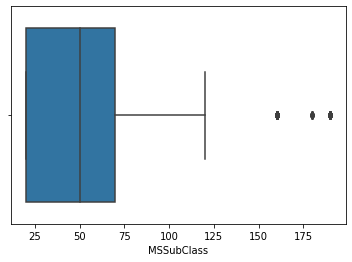

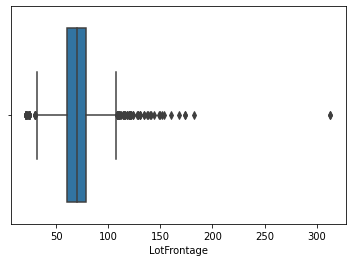

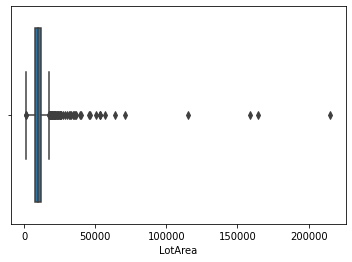

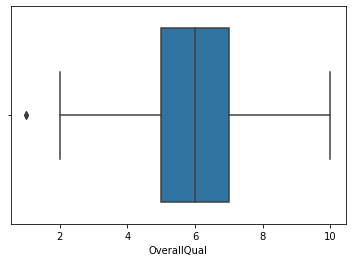

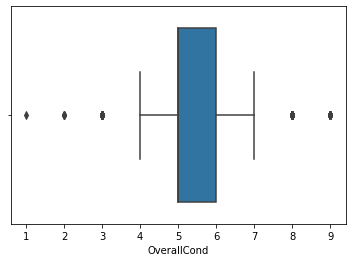

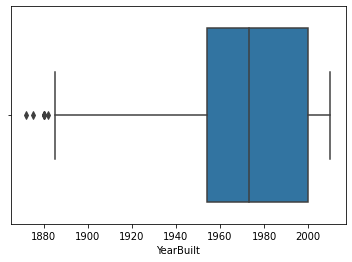

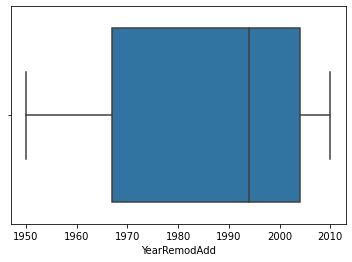

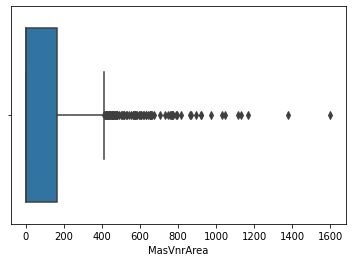

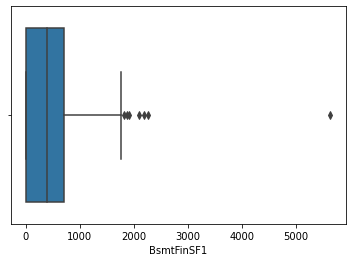

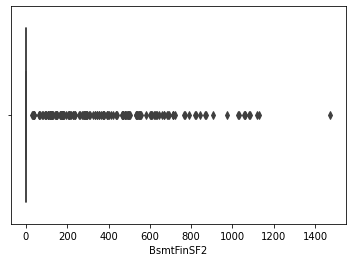

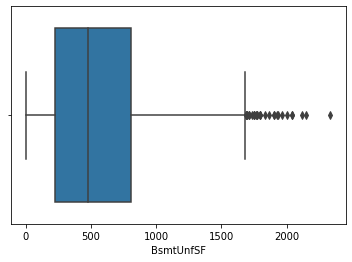

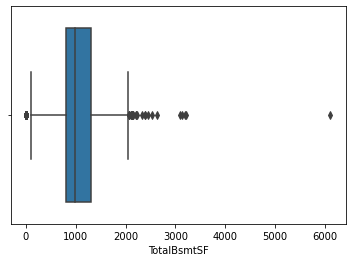

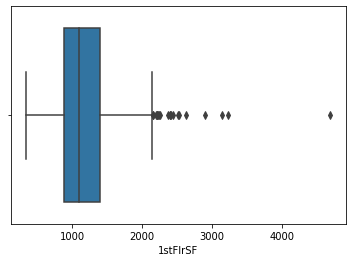

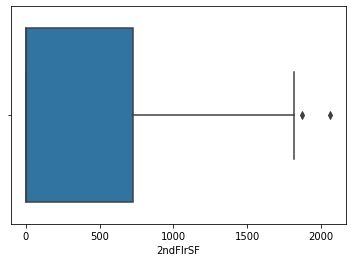

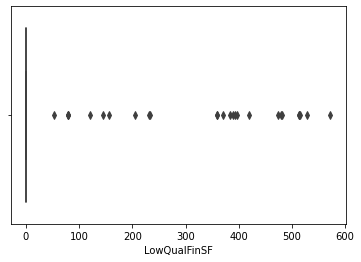

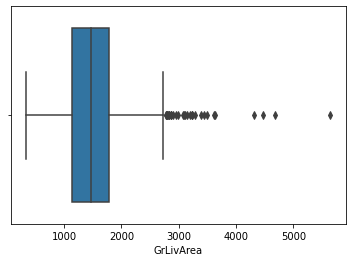

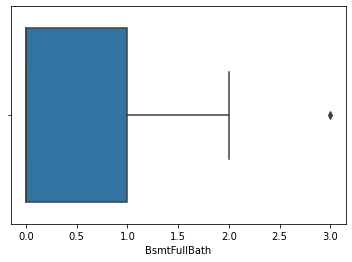

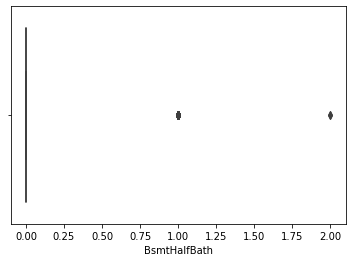

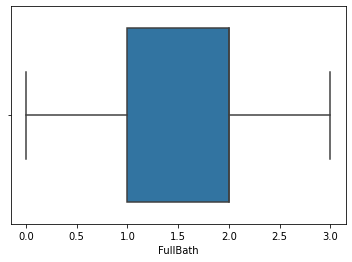

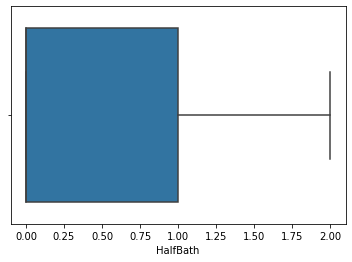

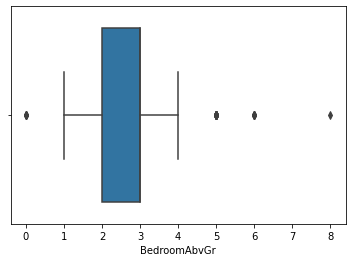

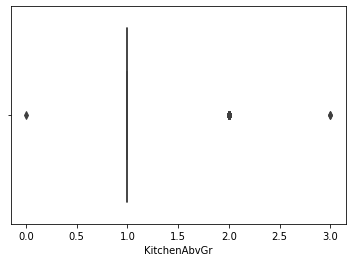

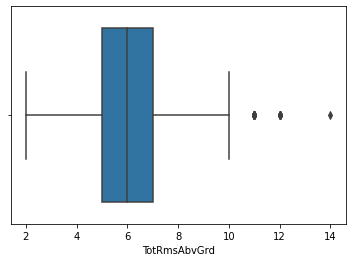

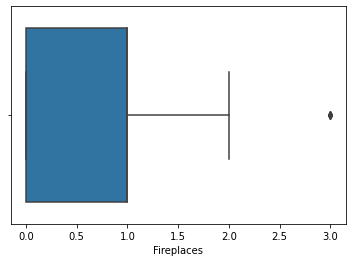

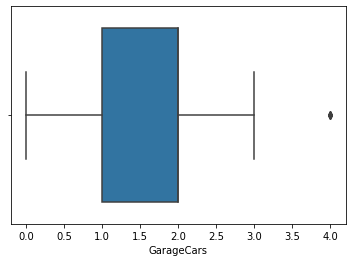

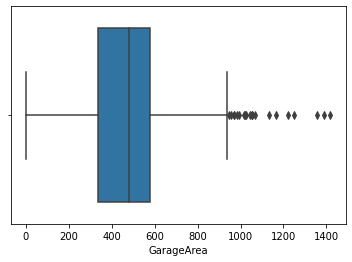

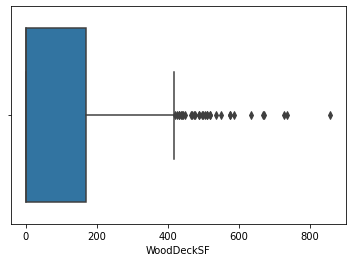

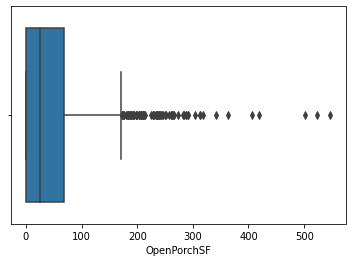

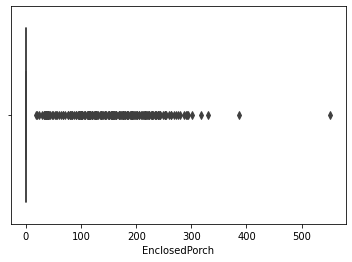

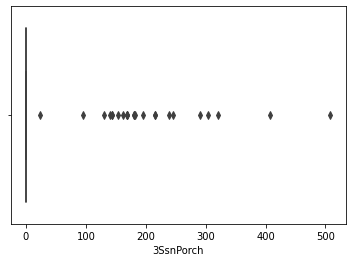

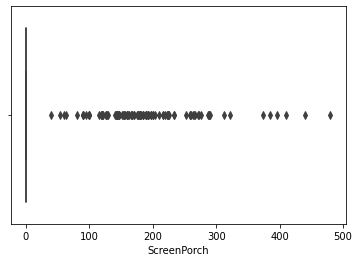

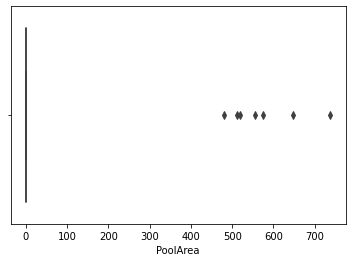

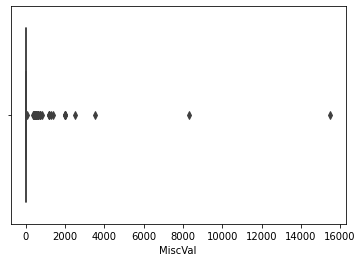

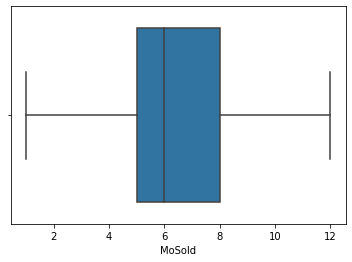

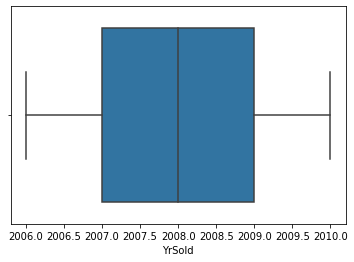

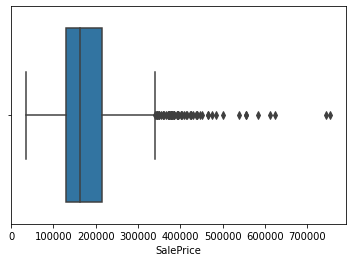

In [36]:
num_columns=df.select_dtypes(include=['int64','float64'])
for col in num_columns:
  plt.figure()
  sn.boxplot(df[col])
  plt.show()

In [37]:
#finding continues feature to remove outliers 
num_columns=df.select_dtypes(include=['int64','float64'])
cont_col=[]
for col in num_columns:
  if len(df[col].unique())>100:
    cont_col.append(col)
cont_col

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'SalePrice']

In [38]:
#removing outliers using zscore
import numpy as np
from scipy import stats
for col in cont_col:
  z_scores=np.abs(stats.zscore(df[col]))
  filtered_entries = z_scores <3
  df=df[filtered_entries]


In [39]:
df.shape

(1210, 236)

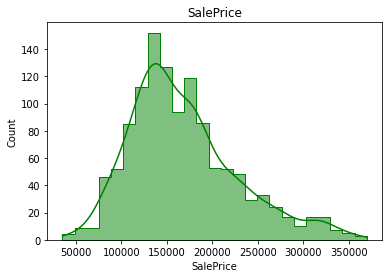

In [40]:
plt.figure()
plt.title("SalePrice")
sn.histplot(df["SalePrice"],kde=True,multiple='dodge',element='step',color='g')
plt.show()

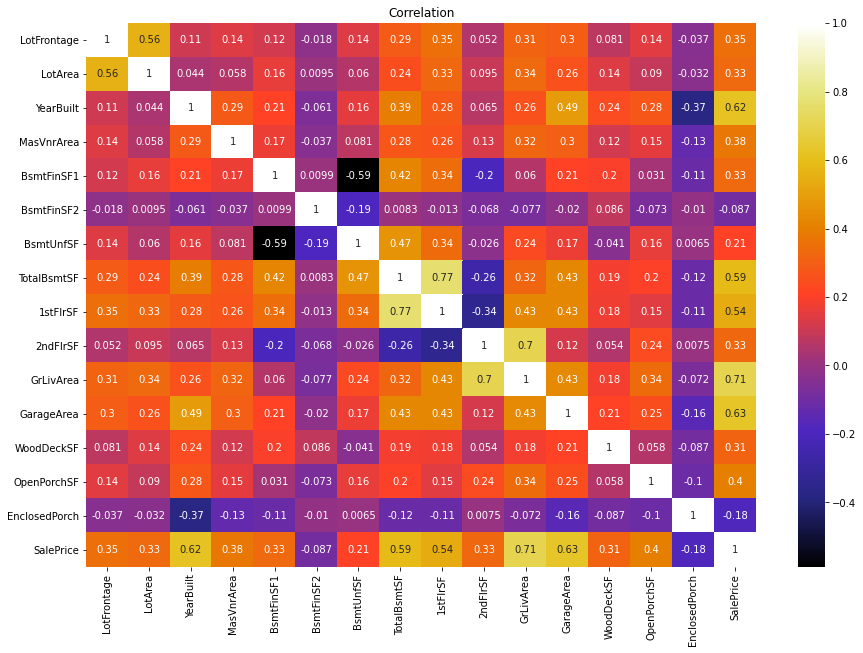

In [41]:
#finding correlation of continues feature wrt to saleprice
cor=df[cont_col].corr()
plt.figure(figsize=(15,10))
sn.heatmap(cor,annot=True,cmap=plt.cm.CMRmap)
plt.title("Correlation")
plt.show()

In [42]:
#detecting irrelevent features 
imposters=[]
for i,value in enumerate(cor["SalePrice"]):
  if abs(value)<0.1:
    imposters.append(cor.columns[i])
imposters

['BsmtFinSF2']

In [43]:
df.drop(imposters,axis=1,inplace=True)
test.drop(imposters,axis=1,inplace=True)

In [44]:
from sklearn.model_selection import train_test_split
x=df.drop('SalePrice',axis=1)
y=df["SalePrice"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
best_features=SelectKBest(mutual_info_regression,k=100)
best_features.fit(x_train,y_train)
features=x_train.columns[best_features.get_support()]

In [46]:
df2=df[features]
test2=test[features]

In [47]:

x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2,random_state=20)

In [48]:
x_train.shape

(968, 100)

In [49]:
stat={
    'random_forest':{
        'model': RandomForestRegressor(),
        'params':{
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            
        }
    },
    'linear_regression':{
      'model': LinearRegression(),
      'params':{
            'fit_intercept':[True,False],
             'normalize':[True,False], 
             'copy_X':[True, False]
      }
    },
    "DecisionTree":{
        'model': DecisionTreeRegressor(),
        'params':{"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
    },
    'xgboost':{
        'model':XGBRegressor(),
        'params':{
            'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,500,700,1000]
              }
        }
    
}

In [50]:
score=[]
for name, model in stat.items():
  clf=GridSearchCV(model['model'],model['params'],cv=5,return_train_score=False)
  clf.fit(x_train,y_train)
  score.append({
      'model':name,
      'best_score': clf.best_score_,
      'best_params':clf.best_params_
  })

In [61]:
pd.DataFrame(score,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,random_forest,0.890017,"{'bootstrap': False, 'max_features': 'sqrt', '..."
1,linear_regression,0.899232,"{'copy_X': True, 'fit_intercept': True, 'norma..."
2,DecisionTree,0.776731,"{'criterion': 'mae', 'max_depth': 8, 'max_leaf..."
3,xgboost,0.912388,"{'colsample_bytree': 0.7, 'learning_rate': 0.0..."


In [62]:
score

[{'best_params': {'bootstrap': False,
   'max_features': 'sqrt',
   'min_samples_split': 2,
   'n_estimators': 20},
  'best_score': 0.8900171854943512,
  'model': 'random_forest'},
 {'best_params': {'copy_X': True, 'fit_intercept': True, 'normalize': False},
  'best_score': 0.8992321057965842,
  'model': 'linear_regression'},
 {'best_params': {'criterion': 'mae',
   'max_depth': 8,
   'max_leaf_nodes': 100,
   'min_samples_leaf': 20,
   'min_samples_split': 20},
  'best_score': 0.776730791737311,
  'model': 'DecisionTree'},
 {'best_params': {'colsample_bytree': 0.7,
   'learning_rate': 0.03,
   'max_depth': 5,
   'min_child_weight': 4,
   'n_estimators': 700,
   'nthread': 4,
   'objective': 'reg:linear',
   'silent': 1,
   'subsample': 0.7},
  'best_score': 0.9123879442933951,
  'model': 'xgboost'}]

In [63]:
model=XGBRegressor(max_depth=5,learning_rate=0.03,colsample_bytree=0.7,min_child_weight=4,objective='reg:linear', n_estimators=700,nthread=4,silent=1,subsample=0.7)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=700,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

In [64]:
model.score(x_test,y_test)

0.8905844558637522

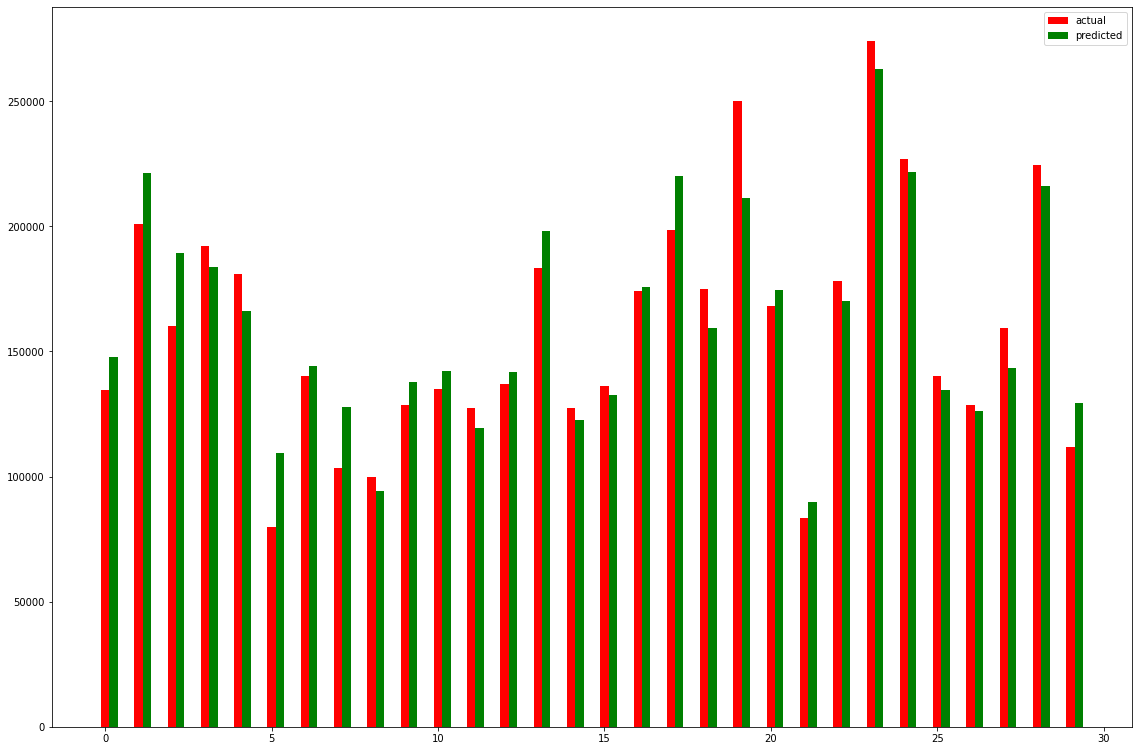

In [65]:
predicted=model.predict(x_test)
X = np.arange(30)
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, y_test[:30], color = 'r', width = 0.25,label='actual')
ax.bar(X + 0.25, predicted[:30], color = 'g', width = 0.25,label='predicted')
plt.legend()
plt.show()

In [66]:
prediction=model.predict(test2)

In [67]:
sub=pd.DataFrame(data=Id)

In [68]:
sub["SalePrice"]=prediction

In [69]:
sub.head()

,Id,SalePrice
0,1461,126530.242188
1,1462,153037.984375
2,1463,181784.968750
3,1464,186968.109375
4,1465,187360.515625


In [70]:
sub.to_csv(r'/content/drive/MyDrive/dataset/submission.csv',index=False)